Reading outut xBIT file

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
SPheno_output = subprocess.getoutput('cat /home/anferivera/Work/xBIT-master/Output/m0_m12_DM_CMSSM_MLS/full_SpectrumFiles')

In [3]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - MSSM Spectrum + Decays + Flavour Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.5  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.15.1  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop mass corrections to Higgs fields based on ',
 '#   M. D. Goods

In [4]:
len(SPheno_output.split('SPheno module generated by SARAH'))

2136

In [5]:
AA = SPheno_output.split('SPheno module generated by SARAH')

In [6]:

for i in range(12,16):
    
    B = AA[i].split('DARKMATTER #')
    
    if len(B)==2:
        Omega = eval(AA[i].split('DARKMATTER #')[1].split()[1])
    
    else:
        Omega = -1.0
        
    print(i, Omega)

12 -1.0
13 -1.0
14 0.286744
15 5.739619


the 15 has problems, because there is no Omega value

In [7]:
x=[]

NUM = len(SPheno_output.split('ENDOFPARAMETERPOINT'))

for i in range(1, NUM):
    
    
    B = AA[i].split('DARKMATTER #')
    
    if len(B)==2:
        Omega = eval(AA[i].split('DARKMATTER #')[1].split()[1])
    
    else:
        Omega = -1.0
    
    m0 = eval(AA[i].split('Block MINPAR  # Input parameters')[1].split()[1])
    m12 = eval(AA[i].split('Block MINPAR  # Input parameters')[1].split()[5])
    #print(i,Omega,m0,m12)
    
    x.append([Omega,m0,m12])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['Omega','m0','m12'])

In [8]:
xd[:3]

,Omega,m0,m12
0,-1.000000,354.60,1840.00
1,20.315536,1652.60,940.90
2,-1.000000,113.39,703.46


In [9]:
xd.shape

(2135, 3)

In [20]:
#For good plots
#plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [10]:
yd = xd[xd.Omega > 0.2]
wd = xd[np.logical_and(xd.Omega >0.0 , xd.Omega < 0.2)]

zd = xd[np.logical_and(xd.Omega >0.05 , xd.Omega < 0.15)]

CLSP = xd[xd.Omega < 0.0]

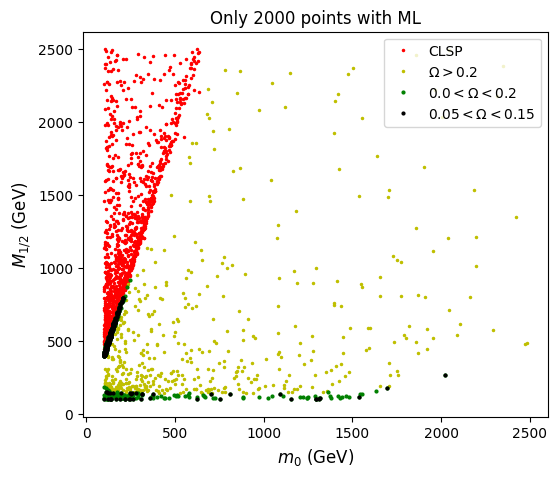

In [14]:
plt.figure(figsize=(6,5))

#plt.plot(xd.m0, xd.m12,'r.')
plt.plot(CLSP.m0, CLSP.m12,'r.', markersize=3, label='CLSP')
plt.plot(yd.m0, yd.m12,'y.', markersize=3, label='$\Omega > 0.2$')
plt.plot(wd.m0, wd.m12,'g.', markersize=4, label='$0.0 < \Omega < 0.2$')
plt.plot(zd.m0, zd.m12,'k.', markersize=4, label='$0.05 < \Omega < 0.15$')

plt.xlabel(r'$m_0$ (GeV)',size=12)
plt.ylabel(r'$M_{1/2}$ (GeV)',size=12)
plt.title('Only 2000 points with ML')
plt.legend()

#plt.tight_layout()

plt.show()

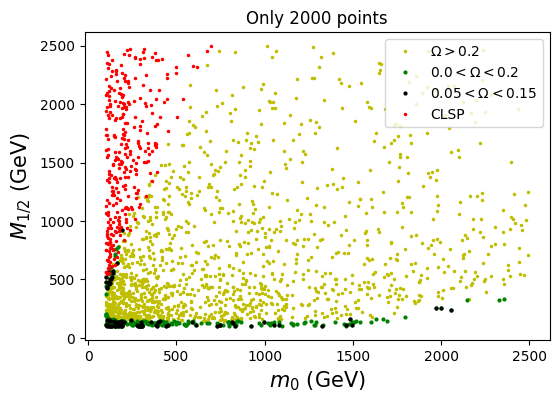

In [19]:
N = 1000
tiempo = 2000 

a=10000*(tiempo/N)*(1/3600)

print(a)

5.555555555555555


In [45]:
a*

13.375925925925923

In [33]:
plt.plot?